In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

# I-94 Traffic Project
## Data from this dataset is specific to a particular station that records only westbound traffic data nearby.

In [589]:
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [590]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


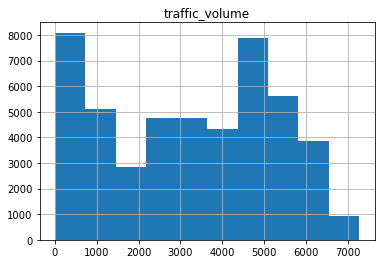

In [591]:
i94.hist('traffic_volume')
plt.show()

In [592]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [593]:
i94['date_time'] = pd.to_datetime(i94['date_time'])
day = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour < 19)]
print(day.shape)
night = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


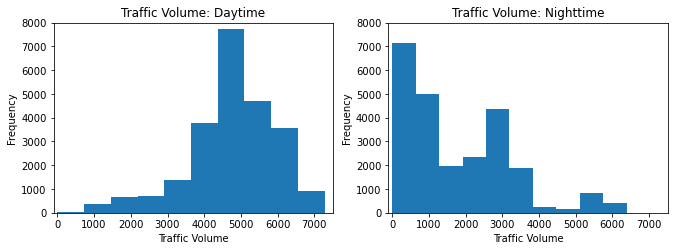

In [594]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Nighttime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [595]:
day['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [596]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

## We see a normal distribution for daytime traffic and a right skewed distribution for nighttime traffic. Our goal is to determine indicators of heavy traffic, so we will omit the nighttime traffic data from the dataset.

In [597]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

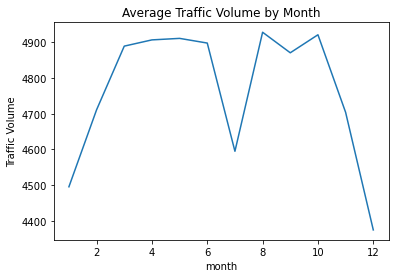

In [598]:
by_month['traffic_volume'].plot.line()
plt.ylabel("Traffic Volume")
plt.title("Average Traffic Volume by Month")
plt.show()

Based on the average traffic volume chart above, we can see that traffic volume decreases most during cold months. It also sees a decrease from June to August which is most likely due to school summer break schedules.

In [599]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

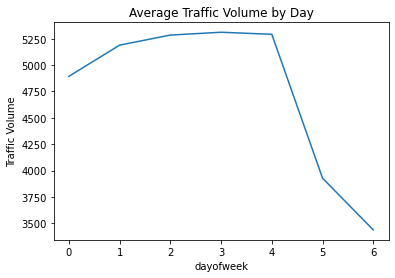

In [600]:
by_dayofweek['traffic_volume'].plot.line()
plt.ylabel("Traffic Volume")
plt.title("Average Traffic Volume by Day")
plt.show()

We see a clear decrease in traffic during weekends as opposed to week days.

In [601]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


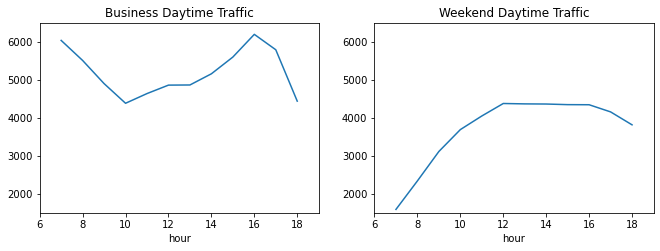

In [602]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,19)
plt.ylim(1500, 6500)
plt.title('Business Daytime Traffic')
plt.subplot(1,2,2)
plt.title('Weekend Daytime Traffic')
plt.xlim(6,19)
plt.ylim(1500, 6500)
by_hour_weekend['traffic_volume'].plot.line()
plt.show()


We can see that a typical business day experiences high traffic volumes throughout the day, but most prominently around 7am and 4pm. A weekend experiences very little traffic volume at 7am and gradually increases until it plateaus around noon. The high point of the weekend is almost the same as the low point of the week day traffic volume.

In [603]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

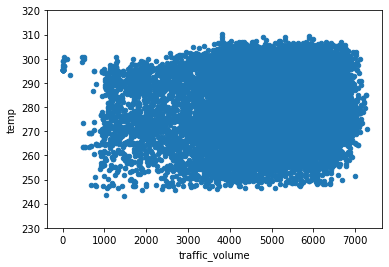

In [604]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320)
plt.show()

The above chart tells us that temp has little to no effect on westbound I-94 traffic volume during the day.

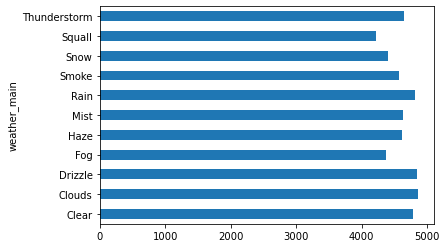

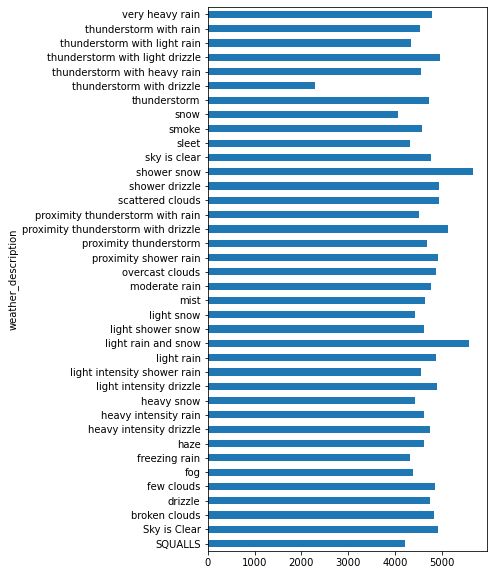

In [608]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

Based on the charts above, there does not appear to be any specific type of weather patterns that correlate with heavy traffic. The weather description chart shows two values that stand out above the others, 'light rain and snow' and 'shower snow', however the weather_main chart does not indicate that snow or rain is indicative of heavy traffic compared to other weather patterns.